# LOGISTIC REGRESSION

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.model_selection import cross_val_score,train_test_split

In [33]:
# loading dataset
try:
    FraudTransactions=pd.read_csv('C:/Users\Raktim\Desktop\Python\PS_20174392719_1491204439457_log.csv')
except:
    print('Database not able to load')
df=FraudTransactions

In [34]:
df = df.loc[(df['type'].isin(['CASH_OUT', 'TRANSFER'])),:] #selecting rows with type 'CASH_OUT' and 'TRANSFER'
df.drop(df.columns[[0,3,6,10]], axis=1, inplace=True)      #droupping columns
df.type=pd.factorize(df.type)[0]                           #factorizing the type column

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,0,181.00,181.0,0.0,0.0,0.00,1
3,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,0,215310.30,705.0,0.0,22425.0,0.00,0
24,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


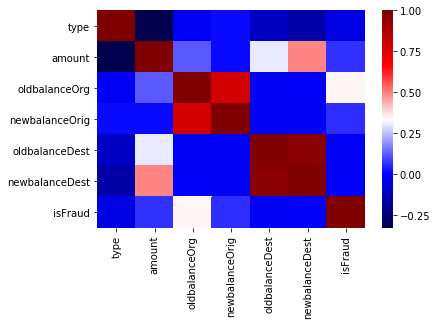

In [36]:
sns.heatmap(df.corr(),cmap='seismic')
plt.show()

In [37]:
y=df.isFraud
df_train, df_test, y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1), y, test_size=0.2, random_state=1)

In [38]:
classifier = LogisticRegression(random_state=0)
classifier.fit(df_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred = classifier.predict(df_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[551418   1005]
 [   465   1194]]


In [40]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    552423
          1       0.54      0.72      0.62      1659

avg / total       1.00      1.00      1.00    554082



In [41]:
y_score = classifier.predict_proba(df_test)[:,1]
y_score

array([1.45913954e-009, 2.45048190e-017, 1.02053611e-256, ...,
       2.32004552e-004, 1.16777770e-021, 1.19721054e-028])

In [42]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [43]:
roc_auc = auc(false_positive_rate, true_positive_rate)

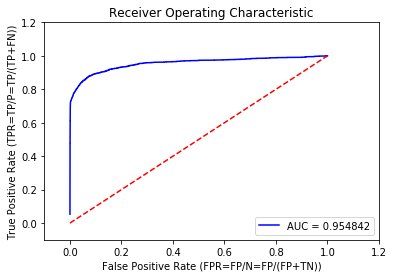

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

In [45]:
scores = cross_val_score(classifier,df, df.isFraud, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.99125402 0.9977368  0.99811219 0.99791547 0.99816814]


In [46]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9966373225730442
